<a href="https://colab.research.google.com/github/mohcenaouadj/AlgerianDialectAnalysis/blob/main/AlgerianDialectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [54]:
df = pd.read_csv('/content/Algerian Review.csv', parse_dates=[0], infer_datetime_format=True, index_col = 0)

In [28]:
print(df.describe())

              likes    sentiment
count   5320.000000  5320.000000
mean      11.284962    -0.235338
std      242.959368     0.627045
min        0.000000    -1.000000
25%        0.000000    -1.000000
50%        0.000000     0.000000
75%        1.000000     0.000000
max    15481.000000     1.000000


In [29]:
df.head()

,date,likes,comment,sentiment,source
name,,,,,
djezzy.dz,04/03/20 10:29:29,2309,استفيدوا من عروض جازي عايلة الجديدة لي توالم ك...,0,insta
amira_la_bonoise,04/03/20 10:31:18,0,Conx ta3koum dayra ki lhaaaam w say,-1,insta
noureddiiiiiine,04/03/20 10:31:38,0,@zaki_medjber_62,0,insta
linaragguem,04/03/20 10:32:28,0,ما فهمتش هي sim وحدة يخدمو بها العائلة كاملة,0,insta
samo_oussama,04/03/20 10:36:29,0,🙏😉🙏,1,insta


Text(0.5, 1.0, 'NO. of comments per Social')

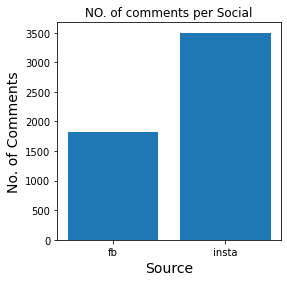

In [30]:
source = df.groupby(['source']).count()
plt.figure(figsize = (4,4))
plt.bar(np.array(source.index), height = source['comment'])
plt.xlabel('Source', size = 14)
plt.ylabel('No. of Comments', size = 14)
plt.title('NO. of comments per Social')
#raw_data.source.unique()

Text(0.5, 1.0, 'Variation of sentiments on comments')

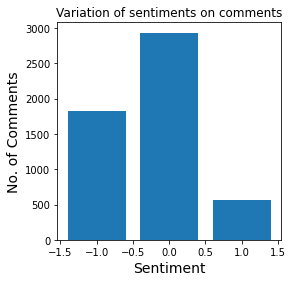

In [31]:
sents = df.groupby(['sentiment']).count()
plt.figure(figsize = (4,4))
plt.bar(np.array(sents.index), height = sents['comment'])
plt.xlabel('Sentiment', size = 14)
plt.ylabel('No. of Comments', size = 14)
plt.title('Variation of sentiments on comments')

In [55]:
df['date'] = pd.to_datetime(df['date'])

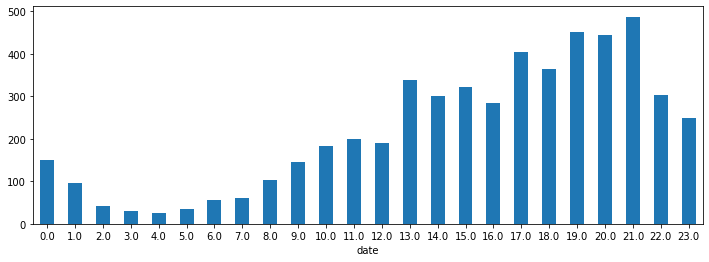

In [58]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df["date"].dt.hour)["comment"].count().plot(kind='bar', rot=0, ax=axs)

In [59]:
import collections
from collections import Counter

[('من', 796),
 ('في', 780),
 ('و', 754),
 ('على', 487),
 ('جازي', 296),
 ('جيزي', 267),
 ('la', 206),
 ('de', 199),
 ('لي', 192),
 ('ما', 190),
 ('لا', 188),
 ('عندي', 179),
 ('الله', 175),
 ('Djezzy', 175),
 ('تاع', 162),
 ('مع', 161),
 ('غير', 156),
 ('كل', 152),
 ('الخاص', 152),
 ('w', 150),
 ('انا', 145),
 ('ولا', 145),
 ('@djezzy.dz', 140),
 ('les', 136),
 ('🙂', 130),
 ('كي', 129),
 ('يا', 117),
 ('والله', 114),
 ('بزاف', 111),
 ('عرض', 104),
 ('?', 103),
 (':)', 103),
 ('et', 101),
 ('راهي', 100),
 ('هذا', 100),
 ('le', 94),
 ('الانترنت', 94),
 ('حتى', 94),
 ('djezzy', 92),
 ('واش', 91),
 ('.', 91),
 ('f', 89),
 ('،', 87),
 ('؟', 85),
 ('cnx', 84),
 ('تاعكم', 83),
 ('عبر', 83),
 ('رقمك', 83),
 ('الهاتفي', 83),
 ('فيها', 80),
 ('راني', 79),
 ('pour', 78),
 ('عليكم', 78),
 ('puce', 76),
 ('connexion', 75),
 ('😂', 75),
 ('شهر', 75),
 ('باش', 74),
 ('عن', 74),
 ('ريزو', 72),
 ('je', 71),
 ('علاش', 71),
 ('انترنت', 69),
 ('a', 68),
 ('pas', 68),
 ('علاه', 68),
 ('en', 67),
 ('كامل', 6

In [61]:
import re

In [64]:
def preprocess_text(df, remove_special=True):
    texts = df['comment'].copy()
    labels = df['sentiment'].copy()

    #Remove links 
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the End Of Sentence characters
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert posts to lowercase
    df["comment"] = df["comment"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["comment"] = df["comment"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

#Preprocessing of entered Text
new_df = preprocess_text(df)

In [66]:
df.describe()

,likes,sentiment
count,5320.000000,5320.000000
mean,11.284962,-0.235338
std,242.959368,0.627045
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,15481.000000,1.000000


In [65]:
new_df.describe()

,likes,sentiment
count,5320.000000,5320.000000
mean,11.284962,-0.235338
std,242.959368,0.627045
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,15481.000000,1.000000


In [67]:
word = list(new_df['comment'].apply(lambda x : x.split()))
words = [x for y in word for x in y]
Counter(words).most_common()

[('eostokendot', 2060),
 ('djezzy', 474),
 ('eostokenquest', 353),
 ('eostokenexs', 319),
 ('connexion', 103),
 ('pour', 84),
 ('rockstar', 79),
 ('puce', 77),
 ('mais', 69),
 ('messenger', 66),
 ('vous', 62),
 ('hayla', 58),
 ('votre', 57),
 ('illimit', 52),
 ('cest', 50),
 ('games', 50),
 ('avec', 49),
 ('rseau', 45),
 ('mois', 45),
 ('izzy', 45),
 ('merci', 43),
 ('plus', 42),
 ('ghir', 42),
 ('nous', 37),
 ('offre', 36),
 ('internet', 36),
 ('fiha', 30),
 ('tila', 29),
 ('jours', 29),
 ('insta', 29),
 ('youtube', 29),
 ('hadi', 27),
 ('takom', 26),
 ('tous', 25),
 ('lazem', 25),
 ('vers', 25),
 ('machi', 24),
 ('rani', 24),
 ('loffre', 23),
 ('rseaux', 22),
 ('priv', 22),
 ('conx', 21),
 ('fantasy', 21),
 ('andi', 20),
 ('bach', 20),
 ('service', 20),
 ('ooredoo', 19),
 ('crdit', 19),
 ('cette', 19),
 ('wela', 19),
 ('lapplication', 19),
 ('dbit', 19),
 ('kifach', 18),
 ('page', 18),
 ('aprs', 18),
 ('chaque', 18),
 ('hada', 18),
 ('rahi', 18),
 ('tout', 18),
 ('comment', 18),
 ('p